<a href="https://colab.research.google.com/github/LucasGanaka/FATEC-MECATRONICA-0791811004-LUCASGANAKA/blob/master/Aula_10_Sist_Integrado_de_Manufatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#notebook para analise de dados
import pandas as pd

In [3]:
#carrega um conjunto de dados para analise
#https://dados.gov.br/dataset/beneficios-concedidos
!wget --no-check-certificate http://dadosabertos.dataprev.gov.br/storage/f/2020-08-20T17%3A51%3A05.439Z/beneficios-concedidos-12-2018.csv

--2020-11-07 06:46:42--  http://dadosabertos.dataprev.gov.br/storage/f/2020-08-20T17%3A51%3A05.439Z/beneficios-concedidos-12-2018.csv
Resolving dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)... 200.152.32.122
Connecting to dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)|200.152.32.122|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dadosabertos.dataprev.gov.br/storage/f/2020-08-20T17%3A51%3A05.439Z/beneficios-concedidos-12-2018.csv [following]
--2020-11-07 06:46:43--  https://dadosabertos.dataprev.gov.br/storage/f/2020-08-20T17%3A51%3A05.439Z/beneficios-concedidos-12-2018.csv
Connecting to dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)|200.152.32.122|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 60455337 (58M) [text/csv]
Saving to: ‘beneficios-concedidos-12-2018.csv’

beneficios-concedid 100%[===================>]  57.65M

In [4]:
#Abrir um arquivo csv no Pandas
dados_raw = pd.read_csv('/content/beneficios-concedidos-12-2018.csv', \
                        sep=';', encoding = "ISO-8859-1")

In [5]:
dados_raw

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
0,2018-12-01,Pensão por Morte Previdenciária,0,Zerados,Concessao Decorrente de Acao Judicial,22/06/2005,Feminino,Urbano,02043-AL-Maceió,Filho,Empregado,Alagoas,"4,326"
1,2018-12-01,Auxílio Salario Maternidade,0,Zerados,Concessao Normal,14/08/1994,Feminino,Rural,03038-AM-São Paulo de Olivença,Filho,Segurado Especial,Amazonas,1
2,2018-12-01,Aposentadoria por Tempo de Contribuição,0,Zerados,Concessao com Conversao Tempo de Servico,09/12/1959,Masculino,Urbano,04307-BA-Simões Filho,Não Informado,Autônomo,Bahia,"1,586"
3,2018-12-01,Auxílio Salario Maternidade,0,Zerados,Concessao Normal,20/08/1981,Feminino,Urbano,04275-BA-Salvador,Filho,Facultativo,Bahia,1
4,2018-12-01,Pensão por Morte Previdenciária,0,Zerados,Concessao Normal,04/01/1956,Feminino,Urbano,04007-BA-Alagoinhas,Cônjuge,Autônomo,Bahia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339429,2018-12-01,Auxílio Doenca Previdenciário,M545,M54.5 Dor Lombar Baixa,Conc. Decorrente Revisao Administrativa,06/01/1990,Masculino,Urbano,28033-TO-Formoso do Araguaia,Filho,Empregado,Tocantins,"1,47"
339430,2018-12-01,Amparo Social ao Idoso,0,Zerados,Concessao Normal,01/10/1953,Feminino,Urbano,28011-TO-Arraias,Não Informado,Desempregado,Tocantins,1
339431,2018-12-01,Auxílio Doenca Previdenciário,S826,S82.6 Frat do Maleolo Lateral,Conc. Base Artigo 27 Inciso Ii do Rbps,25/07/1979,Feminino,Urbano,28008-TO-Araguaína,Não Informado,Empregado,Tocantins,"1,389"
339432,2018-12-01,Auxílio Doenca Previdenciário,C931,C93.1 Leucemia Monocitica Cronica,Concessao Normal,15/09/1952,Masculino,Urbano,28021-TO-Colinas do Tocantins,Não Informado,Empregado,Tocantins,"2,864"


In [6]:
#Forma dos dados
dados_raw.shape

(339434, 13)

In [7]:
#Quais são as colunas
dados_raw.columns

Index(['Competência concessão', 'Espécie', 'CID', 'CID.1', 'Despacho',
       'Dt Nascimento', 'Sexo.', 'Clientela', 'Mun Resid',
       'Vínculo dependentes', 'Forma Filiação', 'UF', 'Qt SM RMI'],
      dtype='object')

In [8]:
#Verifica o describe dos dados
dados_raw.describe()

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
count,339434,339434,339434,339434,339434,339434,339434,339434,339434,339434,339434,339434,339434
unique,1,24,5327,5281,13,28756,2,2,5545,10,10,27,5523
top,2018-12-01,Auxílio Doenca Previdenciário,0,Zerados,Concessao Normal,15/12/1958,Feminino,Urbano,21504-SP-São Paulo,Não Informado,Empregado,São Paulo,1
freq,339434,158713,146082,146080,239442,126,189609,286335,18263,254666,115680,73962,159295


In [9]:
#Tipo dos dados (nas colunas)
dados_raw.dtypes

Competência concessão    object
Espécie                  object
CID                      object
CID.1                    object
Despacho                 object
Dt Nascimento            object
Sexo.                    object
Clientela                object
Mun Resid                object
Vínculo dependentes      object
Forma Filiação           object
UF                       object
Qt SM RMI                object
dtype: object

In [10]:
#Converter a coluna 'Qt SM RMI' para float - parte 1
#https://en.wikipedia.org/wiki/Regular_expression
dados_raw['Qt SM RMI'] = dados_raw['Qt SM RMI'].replace({',':'.'}, regex=True)

In [11]:
#Converter a coluna 'Qt SM RMI' para float - parte 2
dados_raw = dados_raw.astype({'Qt SM RMI':float}, copy=False)

In [12]:
#Com o valor em formato numérico
dados_raw['Qt SM RMI'].describe()

count    339434.000000
mean          1.477993
std           0.994561
min           0.005000
25%           1.000000
50%           1.019000
75%           1.563000
max         262.599000
Name: Qt SM RMI, dtype: float64

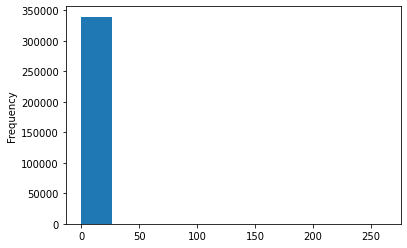

In [13]:
#Colocar um gráfico sobre os valores de pensão
dados_raw['Qt SM RMI'].plot.hist()

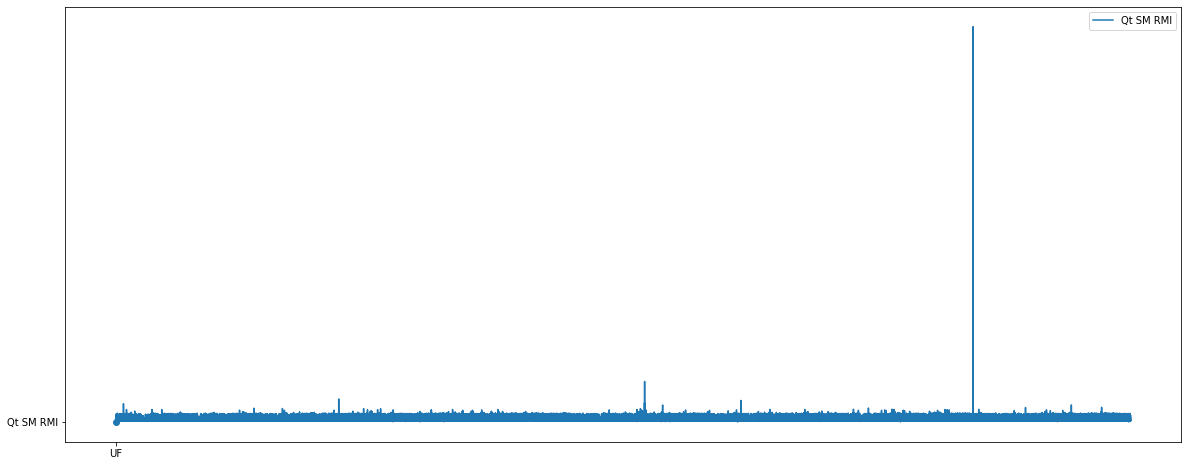

In [14]:
dados_raw.plot(figsize=(20,8)).scatter(x='UF', y='Qt SM RMI')

In [ ]:
dados_raw[dados_raw['Qt SM RMI'] == 262.599]

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
286736,2018-12-01,Amparo Social ao Idoso,0,Zerados,Concessao Decorrente de Acao Judicial,26/01/1952,Masculino,Urbano,24004-AC-Cruzeiro do Sul,Não Informado,Desempregado,Acre,262.599


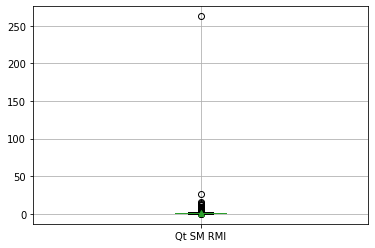

In [ ]:
dados_raw.boxplot(column=['Qt SM RMI'], showmeans=True)

In [ ]:
#https://www.alura.com.br/artigos/como-remover-linhas-e-colunas-no-pandas
#dados_filtrados = dados_raw[dados_raw['Qt SM RMI'] < 240]
dados_filtrados = dados_raw[dados_raw['Qt SM RMI'] < 10]

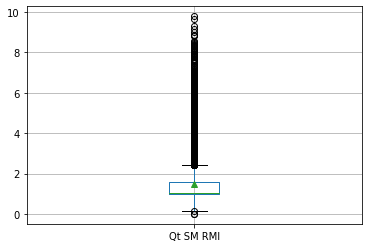

In [ ]:
dados_filtrados.boxplot(column=['Qt SM RMI'], showmeans=True)

In [17]:
dados_raw[dados_raw['Qt SM RMI'] > 10]

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
2477,2018-12-01,Auxílio Salario Maternidade,0,Zerados,Concessao Normal,01/07/1977,Feminino,Urbano,03028-AM-Manaus,Filho Adotivo,Empregado,Amazonas,12.153
74494,2018-12-01,Auxílio Salario Maternidade,0,Zerados,Concessao Normal,13/03/1982,Feminino,Urbano,17010-RJ-Campos dos Goytacazes,Filho Adotivo,Empregado,Rio de Janeiro,15.310
176807,2018-12-01,Auxílio Salario Maternidade,0,Zerados,Concessao Normal,04/08/1975,Feminino,Urbano,19150-RS-Porto Alegre,Filho Adotivo,Empregado,Rio Grande do Sul,12.753
176837,2018-12-01,Pensão por Morte de Ex-Combatente,0,Zerados,Concessao Normal,16/01/1950,Masculino,Urbano,19150-RS-Porto Alegre,Filho,Desempregado,Rio Grande do Sul,26.962
182866,2018-12-01,Auxílio Salario Maternidade,0,Zerados,Concessao Normal,26/05/1975,Feminino,Urbano,21504-SP-São Paulo,Filho Adotivo,Empregado,São Paulo,11.307
209064,2018-12-01,Auxílio Salario Maternidade,0,Zerados,Concessao Normal,13/10/1990,Masculino,Urbano,08186-GO-Rio Verde,Filho Adotivo,Empregado,Goiás,14.357
286736,2018-12-01,Amparo Social ao Idoso,0,Zerados,Concessao Decorrente de Acao Judicial,26/01/1952,Masculino,Urbano,24004-AC-Cruzeiro do Sul,Não Informado,Desempregado,Acre,262.599
319610,2018-12-01,Auxílio Salario Maternidade,0,Zerados,Concessao Normal,09/02/1988,Feminino,Urbano,21504-SP-São Paulo,Filho Adotivo,Empregado,São Paulo,11.352


In [16]:
dados_raw[dados_raw['Qt SM RMI'] > 10].count()

Competência concessão    8
Espécie                  8
CID                      8
CID.1                    8
Despacho                 8
Dt Nascimento            8
Sexo.                    8
Clientela                8
Mun Resid                8
Vínculo dependentes      8
Forma Filiação           8
UF                       8
Qt SM RMI                8
dtype: int64

# **Atividdade**

In [26]:
#carrega um conjunto de dados para analise
#https://dados.gov.br/dataset/beneficios-concedidos
!wget --no-check-certificate http://dadosabertos.dataprev.gov.br/storage/f/2019-03-29T20%3A11%3A16.272Z/concedidos-02-2019.csv

--2020-11-07 07:10:17--  http://dadosabertos.dataprev.gov.br/storage/f/2019-03-29T20%3A11%3A16.272Z/concedidos-02-2019.csv
Resolving dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)... 200.152.32.122
Connecting to dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)|200.152.32.122|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dadosabertos.dataprev.gov.br/storage/f/2019-03-29T20%3A11%3A16.272Z/concedidos-02-2019.csv [following]
--2020-11-07 07:10:17--  https://dadosabertos.dataprev.gov.br/storage/f/2019-03-29T20%3A11%3A16.272Z/concedidos-02-2019.csv
Connecting to dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)|200.152.32.122|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 76541843 (73M) [text/csv]
Saving to: ‘concedidos-02-2019.csv’

concedidos-02-2019. 100%[===================>]  73.00M   548KB/s    in 2m 19s  

2020-11-07 07:12:

In [27]:
dados = pd.read_csv("/content/concedidos-02-2019.csv", sep=";", encoding="ISO-8859-1")

In [28]:
dados

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
0,fevereiro/2019,Pensão por Morte Previdenciária,000000,Zerados,Concessao Normal,15/11/1976,Masculino,Urbano,02043-AL-Maceió,Cônjuge,Desempregado,Alagoas,"1,000"
1,fevereiro/2019,Aposentadoria por Idade,000000,Zerados,Concessao Normal,25/10/1963,Feminino,Rural,02016-AL-Canapi,Não Informado,Segurado Especial,Alagoas,"1,000"
2,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,23/03/1990,Feminino,Rural,02064-AL-Pão de Açúcar,Filho,Segurado Especial,Alagoas,"1,000"
3,fevereiro/2019,Auxílio Doenca Previdenciário,M544,M54.4 Lumbago c/Ciatica,Concessao Normal,03/02/1961,Masculino,Urbano,02029-AL-Girau do Ponciano,Não Informado,Autônomo,Alagoas,"1,000"
4,fevereiro/2019,Auxílio Doenca Previdenciário,S01,S01 Ferim da Cabeca,Conc. Base Artigo 27 Inciso Ii do Rbps,25/08/1976,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Desempregado,Alagoas,"1,254"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409836,fevereiro/2019,Auxílio Acidente,,Em Branco,Concessao Decorrente de Acao Judicial,13/02/1990,Masculino,Urbano,28037-TO-Gurupi,Não Informado,Empregado,Tocantins,"0,500"
409837,fevereiro/2019,Auxílio Doenca Previdenciário,,Em Branco,Concessao Decorrente de Acao Judicial,13/10/1960,Feminino,Urbano,28037-TO-Gurupi,Não Informado,Facultativo,Tocantins,"1,000"
409838,fevereiro/2019,Aposentadoria por Idade,000000,Zerados,Concessao Decorrente de Acao Judicial,12/01/1959,Feminino,Rural,28133-TO-Lavandeira,Não Informado,Segurado Especial,Tocantins,"1,000"
409839,fevereiro/2019,Aposentadoria Invalidez Previdenciária,000000,Zerados,Concessao Decorrente de Acao Judicial,06/10/1952,Feminino,Urbano,28080-TO-Novo Alegre,Não Informado,Facultativo,Tocantins,"1,000"


In [29]:
#Forma dos dados
dados.shape

(409841, 13)

In [31]:
#Converter a coluna 'Qt SM RMI' para float - parte 1
#https://en.wikipedia.org/wiki/Regular_expression
dados['Qt SM RMI'] = dados['Qt SM RMI'].replace({',':'.'}, regex=True)

In [32]:
#Converter a coluna 'Qt SM RMI' para float - parte 2
dados = dados.astype({'Qt SM RMI':float}, copy=False)

In [33]:
#Com o valor em formato numérico
dados['Qt SM RMI'].describe()

count    409841.000000
mean          1.458668
std           0.859082
min           0.028000
25%           1.000000
50%           1.017000
75%           1.536000
max          38.189000
Name: Qt SM RMI, dtype: float64

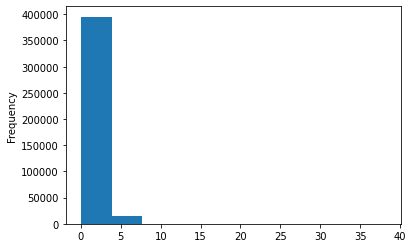

In [34]:
#Colocar um gráfico sobre os valores de pensão
dados['Qt SM RMI'].plot.hist()

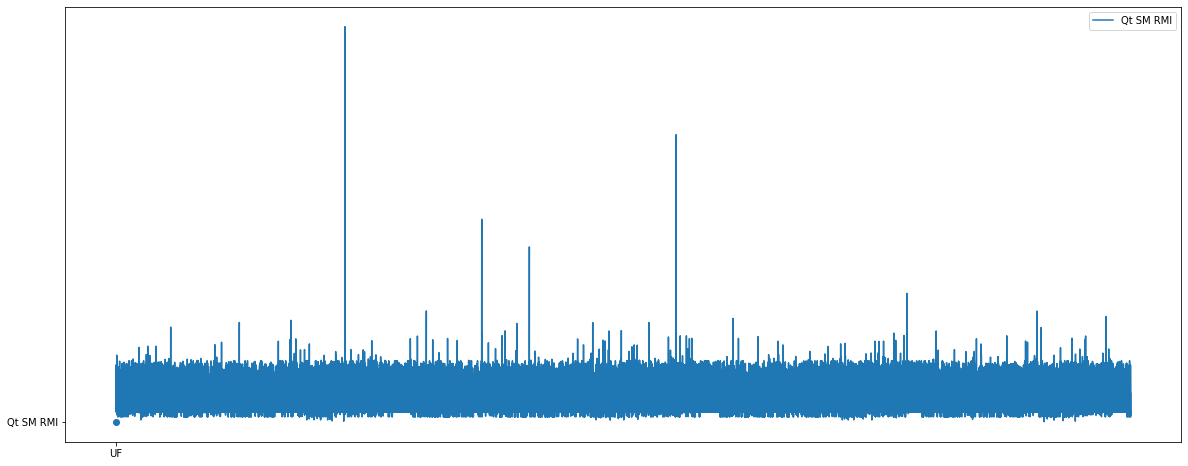

In [35]:
dados.plot(figsize=(20,8)).scatter(x='UF', y='Qt SM RMI')

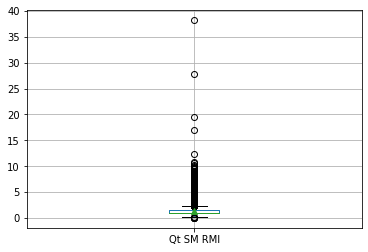

In [36]:
dados.boxplot(column=['Qt SM RMI'], showmeans=True)

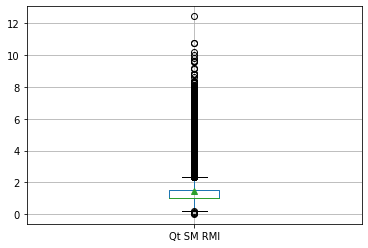

In [38]:
dados2 = dados[dados['Qt SM RMI'] < 15]
dados2.boxplot(column=["Qt SM RMI"], showmeans=True)

In [39]:
dados[dados['Vínculo dependentes'] == "Filho Adotivo"]

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
278,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,18/05/1972,Feminino,Urbano,26002-RO-Porto Velho,Filho Adotivo,Empregado,Amazonas,6.462
3626,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,10/04/1969,Feminino,Urbano,11062-MG-Belo Horizonte,Filho Adotivo,Autônomo,Minas Gerais,1.017
4178,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,14/11/1975,Feminino,Urbano,11067-MG-Betim,Filho Adotivo,Empregado,Minas Gerais,3.390
6333,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,25/09/1977,Feminino,Urbano,14068-PR-Curitiba,Filho Adotivo,Empregado,Paraná,3.983
11085,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,28/11/1980,Feminino,Urbano,20082-SC-Itapema,Filho Adotivo,Autônomo,Santa Catarina,1.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391664,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,09/08/1982,Feminino,Urbano,21526-SP-Suzano,Filho Adotivo,Empregado,São Paulo,8.311
394475,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,03/12/1977,Feminino,Urbano,21388-SP-Piracicaba,Filho Adotivo,Empregado,São Paulo,5.858
399973,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,18/03/1981,Feminino,Urbano,21500-SP-São José dos Campos,Filho Adotivo,Empregado,São Paulo,10.204
405596,fevereiro/2019,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,31/12/1977,Feminino,Urbano,18042-RN-Governador Dixpt Rosado,Filho Adotivo,Autônomo,Distrito Federal,1.018


In [40]:
dados_group = dados.groupby('Vínculo dependentes')
dados_group.describe()

Qt SM RMI                      ...                         
                        count      mean       std  ...     50%      75%     max
Vínculo dependentes                                ...                         
Companheiro            4887.0  1.563792  0.991921  ...  1.0000  1.75500   8.796
Cônjuge               19304.0  1.644162  1.048698  ...  1.0000  1.96800  27.762
Dep. Judicial            89.0  2.428472  1.911688  ...  1.4550  3.32100   8.220
Designado                84.0  1.994536  1.729883  ...  1.0865  2.01475   8.326
Ex-Cônjuge              361.0  3.303535  1.879668  ...  2.9880  4.23400  10.730
Filho                 79582.0  1.370500  0.729522  ...  1.0160  1.42800  10.010
Filho Adotivo           116.0  3.102422  4.474081  ...  1.5865  3.38100  38.189
Irmão                     1.0  2.822000       NaN  ...  2.8220  2.82200   2.822
Não Informado        305296.0  1.464862  0.861821  ...  1.0210  1.54600   8.833
Pai/Mãe                 121.0  1.801802  1.189195  ...  1.3720  1.93600   7.850

[10 rows x 8 columns]

In [41]:
dados_group2 = dados.groupby('Despacho')
dados_group2.describe()

Qt SM RMI            ...                 
                                             count      mean  ...      75%     max
Despacho                                                      ...                 
Conc. Base Artigo 27 Inciso Ii do Rbps     60109.0  1.462129  ...  1.59300   5.385
Conc. Decorrente Revisao Administrativa     5208.0  1.293619  ...  1.16025  12.424
Conc. com Base Artigo 35 da Lei 8213/91     3719.0  0.995698  ...  1.00000   1.000
Conc. com Base no Artigo 180 do Rbps          57.0  1.174807  ...  1.00000   3.788
Conc. com Base no Artigo 183 do Rbps         299.0  1.002425  ...  1.00000   1.523
Conc. s/Verificacao da Perda Qualidade       141.0  1.275809  ...  1.00000   5.328
Concessao Decorrente de Acao Judicial      45467.0  1.330678  ...  1.25400   8.833
Concessao Normal                          289061.0  1.471317  ...  1.55200  38.189
Concessao c/Justificacao Administrativa       50.0  1.444880  ...  1.54850   4.265
Concessao com Conversao Tempo de Servico    3572.0  2.452758  ...  3.20375   5.918
Concessao com Diligencia (Rd ou Sp)           19.0  2.098526  ...  2.68200   5.298
Concessao em Fase Recursal                  2139.0  1.997374  ...  2.70850   8.093

[12 rows x 8 columns]

In [42]:
dados_group3 = dados.groupby('Sexo.')
dados_group3.describe()

Qt SM RMI                                                      
              count      mean       std    min  25%    50%    75%     max
Sexo.                                                                    
Feminino   225344.0  1.341805  0.782631  0.136  1.0  1.000  1.288  38.189
Masculino  184497.0  1.601403  0.924267  0.028  1.0  1.219  1.817   8.833